## IMS Hackathon Food Delivery_Time

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
import os, sys, datetime
from time import time
from sklearn.model_selection import StratifiedKFold
from scipy import stats

%matplotlib inline

In [2]:
os.chdir('C:\\Users\\Anurag\\Documents')

In [3]:
# Geting Data Files in the python envirnoment
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
data = train.append(test, ignore_index=True,sort=False)
print(train.shape,test.shape,data.shape)

(11094, 9) (2774, 8) (13868, 9)


In [4]:
print(data.describe())

              Votes       Reviews
count  13868.000000  13868.000000
mean     241.606504    121.395193
std      495.026832    280.596606
min        3.000000      1.000000
25%       25.000000     10.000000
50%      107.000000     48.000000
75%      244.000000    123.247893
max     9054.000000   6504.000000


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 9 columns):
Restaurant       13868 non-null object
Location         13868 non-null object
Cuisines         13868 non-null object
Average_Cost     13868 non-null object
Minimum_Order    13868 non-null object
Rating           13868 non-null object
Votes            13868 non-null int64
Reviews          13868 non-null float64
Delivery_Time    11094 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 975.2+ KB
None


In [6]:
data.describe(include=['O'])

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Delivery_Time
count,13868,13868,13868,13868,13868,13868.0,11094
unique,8661,35,2392,26,20,34.0,7
top,ID_5538,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,2.5,30 minutes
freq,26,1158,1076,4061,12674,1191.0,7406


In [7]:
# Checking Null values in the data
data.isnull().sum()

Restaurant          0
Location            0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes               0
Reviews             0
Delivery_Time    2774
dtype: int64

In [8]:
#Representing unique values
data.nunique()

Restaurant       8661
Location           35
Cuisines         2392
Average_Cost       26
Minimum_Order      20
Rating             34
Votes            1180
Reviews           812
Delivery_Time       7
dtype: int64

In [9]:
#count of Delivery time
data['Delivery_Time'].value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [10]:
data['Cuisines'] = data['Cuisines'].str.lower() #converting Cuisines to lowercase
data['Cuisines'] = data['Cuisines'].str.replace(' ','') # Removing whitespaces from cuisines
Cuisines_list = data['Cuisines'].str.split(',') # spliting the string of cuisines
Cuisines_counter = Counter(([a for b in Cuisines_list.tolist() for a in b])) # elements are stored as Dictionary key
Cuisines_counter # Representing count of each word from the splitted cuisines

Counter({'fastfood': 3862,
         'rolls': 620,
         'burger': 414,
         'salad': 284,
         'wraps': 97,
         'icecream': 480,
         'desserts': 1548,
         'italian': 751,
         'streetfood': 935,
         'mughlai': 1098,
         'northindian': 5999,
         'chinese': 4339,
         'cafe': 592,
         'beverages': 1789,
         'southindian': 1507,
         'thai': 205,
         'asian': 259,
         'mithai': 386,
         'momos': 397,
         'indonesian': 3,
         'biryani': 1161,
         'kerala': 73,
         'bihari': 14,
         'mexican': 143,
         'japanese': 72,
         'bakery': 864,
         'burmese': 13,
         'bubbletea': 6,
         'tea': 87,
         'pizza': 611,
         'lucknowi': 15,
         'mangalorean': 27,
         'european': 89,
         'continental': 694,
         'sandwich': 339,
         'healthyfood': 352,
         'bengali': 132,
         'american': 163,
         'mishti': 82,
         'hyderabadi'

In [11]:
# Replacing the Cuisines into a proper structer
data['Cuisines'] = data['Cuisines'].str.replace('rolls','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('burger','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('wraps','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('streetfood','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('momos','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('sandwich','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('fingerfood','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('barfood','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('rawmeats','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('hotdogs','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('cafe','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('pizza','fastfood')

data['Cuisines'] = data['Cuisines'].str.replace('icecream','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('mithai','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('bakery','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('bubbletea','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('mishti','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('paan','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('frozenyogurt','desserts')

data['Cuisines'] = data['Cuisines'].str.replace('italian','european')
data['Cuisines'] = data['Cuisines'].str.replace('german','european')
data['Cuisines'] = data['Cuisines'].str.replace('spanish','european')
data['Cuisines'] = data['Cuisines'].str.replace('steak','european')
data['Cuisines'] = data['Cuisines'].str.replace('mediterranean','european')
data['Cuisines'] = data['Cuisines'].str.replace('brazilian','european')
data['Cuisines'] = data['Cuisines'].str.replace('belgian','european')
data['Cuisines'] = data['Cuisines'].str.replace('french','european')
data['Cuisines'] = data['Cuisines'].str.replace('portuguese','european')
data['Cuisines'] = data['Cuisines'].str.replace('african','european')
data['Cuisines'] = data['Cuisines'].str.replace('greek','european')

data['Cuisines'] = data['Cuisines'].str.replace('mexican','american')
data['Cuisines'] = data['Cuisines'].str.replace('bbq','american')
data['Cuisines'] = data['Cuisines'].str.replace('roastchicken','american')
data['Cuisines'] = data['Cuisines'].str.replace('charcoalchicken','american')
data['Cuisines'] = data['Cuisines'].str.replace('tex-mex','american')
data['Cuisines'] = data['Cuisines'].str.replace('southamerican','american')

data['Cuisines'] = data['Cuisines'].str.replace('arabian','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('kebab','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('lebanese','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('afghan','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('iranian','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('middleeastern','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('turkish','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('israeli','middleeast')

data['Cuisines'] = data['Cuisines'].str.replace('chinese','chinese')

data['Cuisines'] = data['Cuisines'].str.replace('kerala','regional')
data['Cuisines'] = data['Cuisines'].str.replace('bihari','regional')
data['Cuisines'] = data['Cuisines'].str.replace('Lucknowi','regional')
data['Cuisines'] = data['Cuisines'].str.replace('mangalorean','regional')
data['Cuisines'] = data['Cuisines'].str.replace('bengali','regional')
data['Cuisines'] = data['Cuisines'].str.replace('andhra','regional')
data['Cuisines'] = data['Cuisines'].str.replace('assamese','regional')
data['Cuisines'] = data['Cuisines'].str.replace('maharashtrian','regional')
data['Cuisines'] = data['Cuisines'].str.replace('chettinad','regional')
data['Cuisines'] = data['Cuisines'].str.replace('parsi','regional')
data['Cuisines'] = data['Cuisines'].str.replace('odia','regional')
data['Cuisines'] = data['Cuisines'].str.replace('tamil','regional')
data['Cuisines'] = data['Cuisines'].str.replace('northeastern','regional')
data['Cuisines'] = data['Cuisines'].str.replace('bohri','regional')
data['Cuisines'] = data['Cuisines'].str.replace('goan','regional')
data['Cuisines'] = data['Cuisines'].str.replace('gujarati','regional')
data['Cuisines'] = data['Cuisines'].str.replace('rajasthani','regional')
data['Cuisines'] = data['Cuisines'].str.replace('naga','regional')
data['Cuisines'] = data['Cuisines'].str.replace('awadhi','regional')
data['Cuisines'] = data['Cuisines'].str.replace('kashmiri','regional')
data['Cuisines'] = data['Cuisines'].str.replace('malwani','regional')

data['Cuisines'] = data['Cuisines'].str.replace('thai','seafood')
data['Cuisines'] = data['Cuisines'].str.replace('konkan','seafood')
data['Cuisines'] = data['Cuisines'].str.replace('srilankan','seafood')
data['Cuisines'] = data['Cuisines'].str.replace('poké','seafood')

data['Cuisines'] = data['Cuisines'].str.replace('indonesian','asian')
data['Cuisines'] = data['Cuisines'].str.replace('japanese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('burmese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('sushi','asian')
data['Cuisines'] = data['Cuisines'].str.replace('cantonese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('tibetan','asian')
data['Cuisines'] = data['Cuisines'].str.replace('malaysian','asian')
data['Cuisines'] = data['Cuisines'].str.replace('vietnamese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('korean','asian')
data['Cuisines'] = data['Cuisines'].str.replace('bangladeshi','asian')
data['Cuisines'] = data['Cuisines'].str.replace('nepalese','asian')


data['Cuisines'] = data['Cuisines'].str.replace('tea','beverages')
data['Cuisines'] = data['Cuisines'].str.replace('juices','beverages')
data['Cuisines'] = data['Cuisines'].str.replace('coffee','beverages')

data['Cuisines'] = data['Cuisines'].str.replace('hyderabadi','biryani')
data['Cuisines'] = data['Cuisines'].str.replace('lucknowi','biryani')

data['Cuisines'] = data['Cuisines'].str.replace('indian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('modernindian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('modernnorthindian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('northindian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('northnorthindian','northindian')


data['Cuisines'] = data['Cuisines'].str.replace('southnorthindian','southindian')

data['Cuisines'] = data['Cuisines'].str.replace('salad','healthyfood')

In [13]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","fastfood,fastfood,fastfood,healthyfood,fastfood",₹200,₹50,3.5,12,4.0,30 minutes
1,ID_2882,"Sector 3, Marathalli","desserts,desserts",₹100,₹50,3.5,11,4.0,30 minutes
2,ID_1595,Mumbai Central,"european,fastfood,fastfood",₹150,₹50,3.6,99,30.0,65 minutes
3,ID_5929,"Sector 1, Noida","mughlai,northindian,chinese",₹250,₹99,3.7,176,95.0,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","fastfood,beverages",₹200,₹99,3.2,521,235.0,65 minutes


In [14]:
data1=data.copy()

In [15]:
#mylst=[]
#for x in data.Cuisines:
 #   s=x.split(',')
  #  mylst.append(s)
   # fo=pd.DataFrame(s)

In [16]:
# Data Cleaning after categorising
data['Cuisines'] = data['Cuisines'].str.lower()
data['Cuisines'] = data['Cuisines'].str.replace(' ','')
Cuisines_list = data['Cuisines'].str.split(',')

In [17]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","fastfood,fastfood,fastfood,healthyfood,fastfood",₹200,₹50,3.5,12,4.0,30 minutes
1,ID_2882,"Sector 3, Marathalli","desserts,desserts",₹100,₹50,3.5,11,4.0,30 minutes
2,ID_1595,Mumbai Central,"european,fastfood,fastfood",₹150,₹50,3.6,99,30.0,65 minutes
3,ID_5929,"Sector 1, Noida","mughlai,northindian,chinese",₹250,₹99,3.7,176,95.0,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","fastfood,beverages",₹200,₹99,3.2,521,235.0,65 minutes


In [18]:
# Removing the string "Mintutes" from the delivery time & converting it to numeric
data['Delivery_Time'] = data['Delivery_Time'].str.replace(' minutes','')
data['Delivery_Time']=pd.to_numeric(data['Delivery_Time'])

In [19]:
# Creating a feature
data['City']=data.Location.str.rpartition(',')[2]
data['Locality']=data.Location.str.rpartition(',')[0]

In [20]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,Locality
0,ID_6321,"FTI College, Law College Road, Pune","fastfood,fastfood,fastfood,healthyfood,fastfood",₹200,₹50,3.5,12,4.0,30.0,Pune,"FTI College, Law College Road"
1,ID_2882,"Sector 3, Marathalli","desserts,desserts",₹100,₹50,3.5,11,4.0,30.0,Marathalli,Sector 3
2,ID_1595,Mumbai Central,"european,fastfood,fastfood",₹150,₹50,3.6,99,30.0,65.0,Mumbai Central,
3,ID_5929,"Sector 1, Noida","mughlai,northindian,chinese",₹250,₹99,3.7,176,95.0,30.0,Noida,Sector 1
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","fastfood,beverages",₹200,₹99,3.2,521,235.0,65.0,Whitefield,"Rmz Centennial, I Gate"


In [21]:
# cleaning data for Locality Feature
data.Locality[data.City.str.contains('Delhi University-GTB Nagar')]='Delhi University-GTB Nagar'
data.Locality[data.City.str.contains('Mumbai Central')]='Mumbai Central'
data.Locality[data.City.str.contains('Majestic')]='Majestic'
data.Locality[data.City.str.contains('Delhi Cantt.')]='Delhi Cantt'
data.Locality[data.City.str.contains('Pune University')]='Pune University'
data['Locality'] = data['Locality'].str.strip() 
data['Locality'] = data['Locality'].str.lower()

C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Anurag\Anaconda3\

In [22]:
# cleaning the City Feature created earlier
data.City[data.City.str.contains('Delhi University-GTB Nagar')]='Delhi'
data.City[data.City.str.contains('Mumbai CST Area')]='Mumbai'
data.City[data.City.str.contains('Mumbai Central')]='Mumbai'
data.City[data.City.str.contains('India Gate')]='Delhi'
data.City[data.City.str.contains('Delhi Cantt.')]='Delhi'
data.City[data.City.str.contains('Maharashtra')]='Pune'
data.City[data.City.str.contains('Pune University')]='Pune'
data.City[data.City.str.contains('Gurgoan')]='Gurgaon'
data.City[data.City.str.contains('Electronic City')]='Bangalore'

# data.City[data.City.str.contains('Whitefield')]='Bangalore'
# data.City[data.City.str.contains('Marathalli')]='Bangalore'

data['City'] = data['City'].str.strip()
data['City'] = data['City'].str.lower()
del data['Location']

C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Anurag\Anaconda3\

In [23]:
data.head()

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,Locality
0,ID_6321,"fastfood,fastfood,fastfood,healthyfood,fastfood",₹200,₹50,3.5,12,4.0,30.0,pune,"fti college, law college road"
1,ID_2882,"desserts,desserts",₹100,₹50,3.5,11,4.0,30.0,marathalli,sector 3
2,ID_1595,"european,fastfood,fastfood",₹150,₹50,3.6,99,30.0,65.0,mumbai,mumbai central
3,ID_5929,"mughlai,northindian,chinese",₹250,₹99,3.7,176,95.0,30.0,noida,sector 1
4,ID_6123,"fastfood,beverages",₹200,₹99,3.2,521,235.0,65.0,whitefield,"rmz centennial, i gate"


In [24]:
data1=data.copy()

In [25]:
# cleaning averagee cost
data['Average_Cost'] = data['Average_Cost'].str.replace("[^0-9]","")
data['Average_Cost'] = data['Average_Cost'].str.strip()
data['Average_Cost']=pd.to_numeric(data['Average_Cost'])

# data.Average_Cost.fillna(data.groupby(['City','Locality'])['Average_Cost'].transform('mean'), inplace=True)

data['Minimum_Order'] = data['Minimum_Order'].str.replace("[^0-9]","")
data['Minimum_Order'] = data['Minimum_Order'].str.strip()
data['Minimum_Order']=pd.to_numeric(data['Minimum_Order'])

In [26]:
data.head()

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,Locality
0,ID_6321,"fastfood,fastfood,fastfood,healthyfood,fastfood",200.0,50,3.5,12,4.0,30.0,pune,"fti college, law college road"
1,ID_2882,"desserts,desserts",100.0,50,3.5,11,4.0,30.0,marathalli,sector 3
2,ID_1595,"european,fastfood,fastfood",150.0,50,3.6,99,30.0,65.0,mumbai,mumbai central
3,ID_5929,"mughlai,northindian,chinese",250.0,99,3.7,176,95.0,30.0,noida,sector 1
4,ID_6123,"fastfood,beverages",200.0,99,3.2,521,235.0,65.0,whitefield,"rmz centennial, i gate"


In [27]:
#Cleaning Restaurant feature
data['Restaurant'] = data['Restaurant'].str.replace("ID_","")
data['Restaurant'] = data['Restaurant'].str.strip()
data['Restaurant']=pd.to_numeric(data['Restaurant'])

In [28]:
data.head()

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,Locality
0,6321,"fastfood,fastfood,fastfood,healthyfood,fastfood",200.0,50,3.5,12,4.0,30.0,pune,"fti college, law college road"
1,2882,"desserts,desserts",100.0,50,3.5,11,4.0,30.0,marathalli,sector 3
2,1595,"european,fastfood,fastfood",150.0,50,3.6,99,30.0,65.0,mumbai,mumbai central
3,5929,"mughlai,northindian,chinese",250.0,99,3.7,176,95.0,30.0,noida,sector 1
4,6123,"fastfood,beverages",200.0,99,3.2,521,235.0,65.0,whitefield,"rmz centennial, i gate"


In [29]:
# Cleaning unwanted symbols
data.Rating = data.Rating.replace("NEW",np.nan)
data.Rating = data.Rating.replace("-",np.nan)
data.Rating = data.Rating.replace("Opening Soon",np.nan)
data.Rating = data.Rating.replace("Temporarily Closed",np.nan)
data.Rating = data.Rating.astype('float')
# data.Rating.fillna(data.groupby(['City','Locality'])['Rating'].transform('mean'), inplace=True)
#data.Rating.fillna(0, inplace=True)

In [30]:
data.Votes = data.Votes.replace("-",np.nan)
data.Votes = data.Votes.astype('float')
# data.Votes.fillna(data.groupby(['City','Locality'])['Votes'].transform('mean'), inplace=True)
#data.Votes.fillna(0, inplace=True)

In [31]:
data.Reviews = data.Reviews.replace("-",np.nan)
data.Reviews = data.Reviews.astype('float')
# data.Reviews.fillna(data.groupby(['City','Locality'])['Reviews'].transform('mean'), inplace=True)
#data.Reviews.fillna(0, inplace=True)

In [32]:
print(data.shape)

(13868, 10)


In [33]:
data['total_div_of_reviews'] = data['Votes']/data['Reviews']
data['total_sum_of_reviews'] = data['Votes']*data['Reviews']

data['total_div_of_ratings'] = data['Votes']/data['Rating']
data['total_sum_of_ratings'] = data['Votes']*data['Rating']

data['total_div_of_Minimum_Order'] = data['Votes']/data['Minimum_Order']
data['total_sum_of_Minimum_Order'] = data['Votes']*data['Minimum_Order']

data['total_div_of_Average_Cost'] = data['Votes']/data['Average_Cost']
data['total_sum_of_Average_Cost'] = data['Votes']*data['Average_Cost']

data['total_div_of_ratings_Reviews'] = data['Rating']/data['Reviews']
data['total_sum_of_ratings_1'] = data['Rating']*data['Reviews']

data['total_div_of_Minimum_Order_1'] = data['Rating']/data['Minimum_Order']
data['total_sum_of_Minimum_Order_1'] = data['Rating']*data['Minimum_Order']

data['total_div_of_Average_Cost_1'] = data['Rating']/data['Average_Cost']
data['total_sum_of_Average_Cost_1'] = data['Rating']*data['Average_Cost']

data['total_div_of_reviews_Minimum_Order_1'] = data['Reviews']/data['Minimum_Order']
data['total_sum_of_reviews_Minimum_Order_1'] = data['Reviews']*data['Minimum_Order']

data['total_div_of_reviews_Average_Cost_1'] = data['Reviews']/data['Average_Cost']
data['total_sum_of_reviews_Average_Cost_1'] = data['Reviews']*data['Average_Cost']

data['total_div_of_Minimum_Order_Average_Cost_1'] = data['Average_Cost']/data['Minimum_Order']
data['total_sum_of_Minimum_Order_Average_Cost_1'] = data['Average_Cost']*data['Minimum_Order']

In [34]:
data1['total_div_of_reviews']  = data['total_div_of_reviews']
data1['total_div_of_ratings']  = data['total_div_of_ratings']
data1['total_sum_of_Average_Cost']  = data['total_sum_of_Average_Cost']
data1['total_div_of_Average_Cost_1']  = data['total_div_of_Average_Cost_1']
data1['total_div_of_Minimum_Order_1']  = data['total_div_of_Minimum_Order_1']
data1['total_sum_of_Minimum_Order']  = data['total_sum_of_Minimum_Order']
data1['total_div_of_Average_Cost']  = data['total_div_of_Average_Cost']
data1['total_div_of_ratings_Reviews']  = data['total_div_of_ratings_Reviews']
data1['total_div_of_reviews_Average_Cost_1']  = data['total_div_of_reviews_Average_Cost_1']
data1['total_sum_of_Average_Cost_1']  = data['total_sum_of_Average_Cost_1']
data1['total_sum_of_reviews_Minimum_Order_1']  = data['total_sum_of_reviews_Minimum_Order_1']
data1['total_div_of_Minimum_Order']  = data['total_div_of_Minimum_Order']
data1['total_sum_of_ratings_1']  = data['total_sum_of_ratings_1']
data1['total_sum_of_reviews']  = data['total_sum_of_reviews']
data1['total_sum_of_ratings']  = data['total_sum_of_ratings']
data1['total_sum_of_reviews_Average_Cost_1']  = data['total_sum_of_reviews_Average_Cost_1']
data1['total_sum_of_Minimum_Order_1']  = data['total_sum_of_Minimum_Order_1']
data1['total_div_of_reviews_Minimum_Order_1']  = data['total_div_of_reviews_Minimum_Order_1']
data1['total_div_of_Minimum_Order_Average_Cost_1']  = data['total_div_of_Minimum_Order_Average_Cost_1']
data1['total_sum_of_Minimum_Order_Average_Cost_1']  = data['total_sum_of_Minimum_Order_Average_Cost_1']

In [35]:
data1.shape

(13868, 30)

In [36]:
data.shape

(13868, 30)

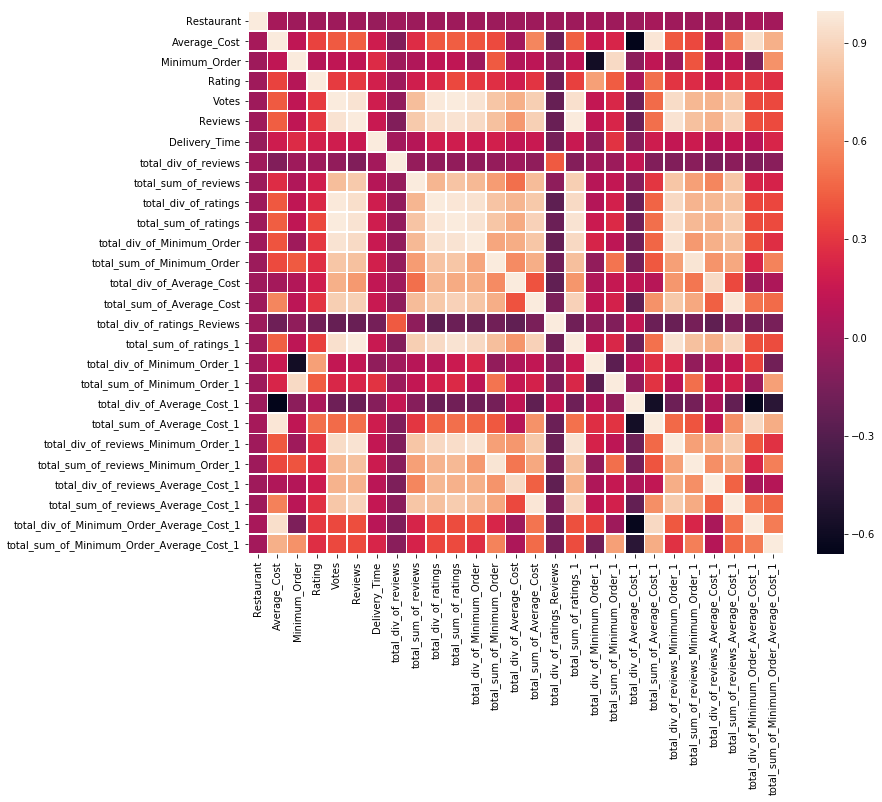

In [37]:
#colormap = plt.cm.RdBu
#plt.figure(figsize=(13,13))
#sns.heatmap(data1.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
fig = plt.figure(figsize=(12,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

In [38]:
# Removing highly correlated features(overfitting adjustment)
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [39]:
data.shape

(13868, 21)

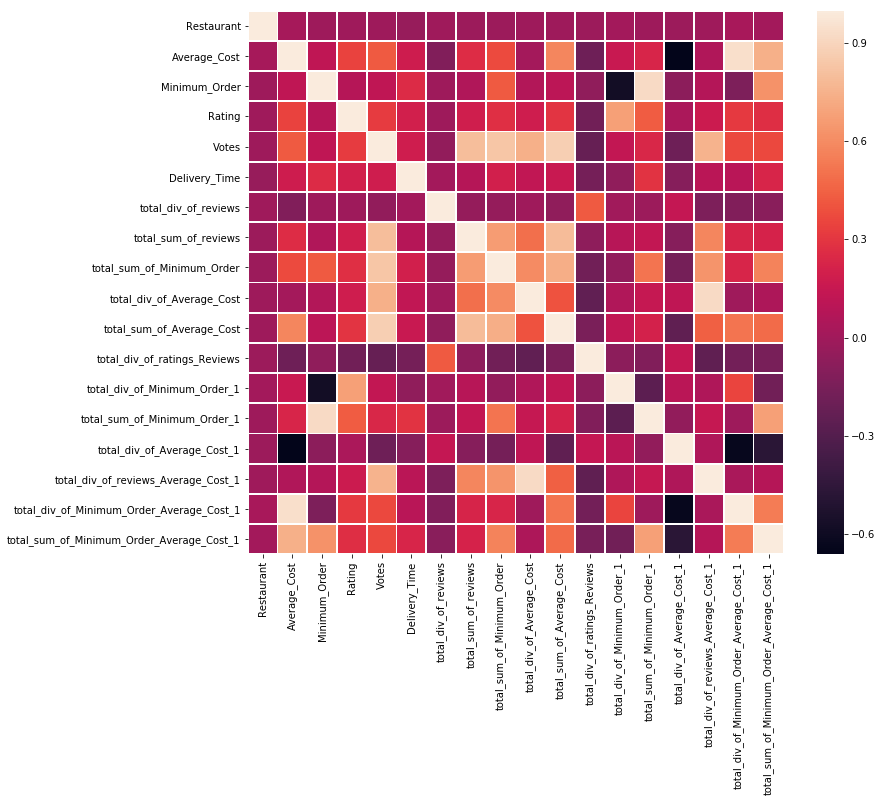

In [40]:
# calculate the correlation matrix after selecting important features
corr = data.corr()

# plot the heatmap
fig = plt.figure(figsize=(12,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

In [41]:
data.head()

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Delivery_Time,City,Locality,total_div_of_reviews,...,total_sum_of_Minimum_Order,total_div_of_Average_Cost,total_sum_of_Average_Cost,total_div_of_ratings_Reviews,total_div_of_Minimum_Order_1,total_sum_of_Minimum_Order_1,total_div_of_Average_Cost_1,total_div_of_reviews_Average_Cost_1,total_div_of_Minimum_Order_Average_Cost_1,total_sum_of_Minimum_Order_Average_Cost_1
0,6321,"fastfood,fastfood,fastfood,healthyfood,fastfood",200.0,50,3.5,12.0,30.0,pune,"fti college, law college road",3.000000,...,600.0,0.060,2400.0,0.875000,0.070000,175.0,0.0175,0.020,4.000000,10000.0
1,2882,"desserts,desserts",100.0,50,3.5,11.0,30.0,marathalli,sector 3,2.750000,...,550.0,0.110,1100.0,0.875000,0.070000,175.0,0.0350,0.040,2.000000,5000.0
2,1595,"european,fastfood,fastfood",150.0,50,3.6,99.0,65.0,mumbai,mumbai central,3.300000,...,4950.0,0.660,14850.0,0.120000,0.072000,180.0,0.0240,0.200,3.000000,7500.0
3,5929,"mughlai,northindian,chinese",250.0,99,3.7,176.0,30.0,noida,sector 1,1.852632,...,17424.0,0.704,44000.0,0.038947,0.037374,366.3,0.0148,0.380,2.525253,24750.0
4,6123,"fastfood,beverages",200.0,99,3.2,521.0,65.0,whitefield,"rmz centennial, i gate",2.217021,...,51579.0,2.605,104200.0,0.013617,0.032323,316.8,0.0160,1.175,2.020202,19800.0


In [42]:
data123=data.copy()

In [43]:
data30=data.fillna(data.mean())

In [44]:
data30.head()

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Delivery_Time,City,Locality,total_div_of_reviews,...,total_sum_of_Minimum_Order,total_div_of_Average_Cost,total_sum_of_Average_Cost,total_div_of_ratings_Reviews,total_div_of_Minimum_Order_1,total_sum_of_Minimum_Order_1,total_div_of_Average_Cost_1,total_div_of_reviews_Average_Cost_1,total_div_of_Minimum_Order_Average_Cost_1,total_sum_of_Minimum_Order_Average_Cost_1
0,6321,"fastfood,fastfood,fastfood,healthyfood,fastfood",200.0,50,3.5,12.0,30.0,pune,"fti college, law college road",3.000000,...,600.0,0.060,2400.0,0.875000,0.070000,175.0,0.0175,0.020,4.000000,10000.0
1,2882,"desserts,desserts",100.0,50,3.5,11.0,30.0,marathalli,sector 3,2.750000,...,550.0,0.110,1100.0,0.875000,0.070000,175.0,0.0350,0.040,2.000000,5000.0
2,1595,"european,fastfood,fastfood",150.0,50,3.6,99.0,65.0,mumbai,mumbai central,3.300000,...,4950.0,0.660,14850.0,0.120000,0.072000,180.0,0.0240,0.200,3.000000,7500.0
3,5929,"mughlai,northindian,chinese",250.0,99,3.7,176.0,30.0,noida,sector 1,1.852632,...,17424.0,0.704,44000.0,0.038947,0.037374,366.3,0.0148,0.380,2.525253,24750.0
4,6123,"fastfood,beverages",200.0,99,3.2,521.0,65.0,whitefield,"rmz centennial, i gate",2.217021,...,51579.0,2.605,104200.0,0.013617,0.032323,316.8,0.0160,1.175,2.020202,19800.0


In [45]:
label_encoder = preprocessing.LabelEncoder()

data30['Cuisines'] = label_encoder.fit_transform(data30['Cuisines'])
data30['City'] = label_encoder.fit_transform(data30['City'])
data30['Locality'] = label_encoder.fit_transform(data30['Locality'])

In [46]:
data30.head()

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Delivery_Time,City,Locality,total_div_of_reviews,...,total_sum_of_Minimum_Order,total_div_of_Average_Cost,total_sum_of_Average_Cost,total_div_of_ratings_Reviews,total_div_of_Minimum_Order_1,total_sum_of_Minimum_Order_1,total_div_of_Average_Cost_1,total_div_of_reviews_Average_Cost_1,total_div_of_Minimum_Order_Average_Cost_1,total_sum_of_Minimum_Order_Average_Cost_1
0,6321,840,200.0,50,3.5,12.0,30.0,10,10,3.000000,...,600.0,0.060,2400.0,0.875000,0.070000,175.0,0.0175,0.020,4.000000,10000.0
1,2882,477,100.0,50,3.5,11.0,30.0,7,30,2.750000,...,550.0,0.110,1100.0,0.875000,0.070000,175.0,0.0350,0.040,2.000000,5000.0
2,1595,610,150.0,50,3.6,99.0,65.0,8,19,3.300000,...,4950.0,0.660,14850.0,0.120000,0.072000,180.0,0.0240,0.200,3.000000,7500.0
3,5929,1060,250.0,99,3.7,176.0,30.0,9,28,1.852632,...,17424.0,0.704,44000.0,0.038947,0.037374,366.3,0.0148,0.380,2.525253,24750.0
4,6123,662,200.0,99,3.2,521.0,65.0,12,26,2.217021,...,51579.0,2.605,104200.0,0.013617,0.032323,316.8,0.0160,1.175,2.020202,19800.0


In [63]:
data30.dtypes

Restaurant                                   float64
Cuisines                                     float64
Average_Cost                                 float64
Minimum_Order                                float64
Rating                                       float64
Votes                                        float64
Delivery_Time                                float64
City                                         float64
Locality                                     float64
total_div_of_reviews                         float64
total_sum_of_reviews                         float64
total_sum_of_Minimum_Order                   float64
total_div_of_Average_Cost                    float64
total_sum_of_Average_Cost                    float64
total_div_of_ratings_Reviews                 float64
total_div_of_Minimum_Order_1                 float64
total_sum_of_Minimum_Order_1                 float64
total_div_of_Average_Cost_1                  float64
total_div_of_reviews_Average_Cost_1          f

In [62]:
#data30['Restaurant'] = data30['Restaurant'].astype(float)
data30['Cuisines'] = data30['Cuisines'].astype(float)
data30['Minimum_Order'] = data30['Minimum_Order'].astype(float)
data30['City'] = data30['City'].astype(float)
data30['Locality'] = data30['Locality'].astype(float)

In [71]:
#we will normalize our data so the prediction on all features will be at the same scale
X = data30.iloc[:,0:20].values
y = data30.iloc[:,6].values
#normalize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=data30.index, columns=data30.columns[0:20])
# # add non-feature target column to dataframe
dfNorm['Delivery_Time'] = data30['Delivery_Time']
dfNorm.head(10)

X = dfNorm.iloc[:,0:15].values
y = dfNorm.iloc[:,6].values

ValueError: Input contains infinity or a value too large for dtype('float64').

In [67]:
pd.DataFrame(data30).fillna(0)

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Delivery_Time,City,Locality,total_div_of_reviews,...,total_sum_of_Minimum_Order,total_div_of_Average_Cost,total_sum_of_Average_Cost,total_div_of_ratings_Reviews,total_div_of_Minimum_Order_1,total_sum_of_Minimum_Order_1,total_div_of_Average_Cost_1,total_div_of_reviews_Average_Cost_1,total_div_of_Minimum_Order_Average_Cost_1,total_sum_of_Minimum_Order_Average_Cost_1
0,6321.0,840.0,200.0,50.0,3.500000,12.0,30.000000,10.0,10.0,3.000000,...,600.0,0.060000,2400.0,0.875000,0.070000,175.000000,0.017500,0.020000,4.000000,10000.0
1,2882.0,477.0,100.0,50.0,3.500000,11.0,30.000000,7.0,30.0,2.750000,...,550.0,0.110000,1100.0,0.875000,0.070000,175.000000,0.035000,0.040000,2.000000,5000.0
2,1595.0,610.0,150.0,50.0,3.600000,99.0,65.000000,8.0,19.0,3.300000,...,4950.0,0.660000,14850.0,0.120000,0.072000,180.000000,0.024000,0.200000,3.000000,7500.0
3,5929.0,1060.0,250.0,99.0,3.700000,176.0,30.000000,9.0,28.0,1.852632,...,17424.0,0.704000,44000.0,0.038947,0.037374,366.300000,0.014800,0.380000,2.525253,24750.0
4,6123.0,662.0,200.0,99.0,3.200000,521.0,65.000000,12.0,26.0,2.217021,...,51579.0,2.605000,104200.0,0.013617,0.032323,316.800000,0.016000,1.175000,2.020202,19800.0
5,5221.0,1591.0,150.0,50.0,3.800000,46.0,30.000000,12.0,26.0,2.555556,...,2300.0,0.306667,6900.0,0.211111,0.076000,190.000000,0.025333,0.120000,3.000000,7500.0
6,3777.0,109.0,150.0,50.0,3.700000,108.0,30.000000,8.0,19.0,3.483871,...,5400.0,0.720000,16200.0,0.119355,0.074000,185.000000,0.024667,0.206667,3.000000,7500.0
7,745.0,345.0,650.0,50.0,4.000000,1731.0,45.000000,2.0,8.0,1.401619,...,86550.0,2.663077,1125150.0,0.003239,0.080000,200.000000,0.006154,1.900000,13.000000,32500.0
8,2970.0,495.0,100.0,50.0,3.900000,110.0,30.000000,2.0,8.0,4.230769,...,5500.0,1.100000,11000.0,0.150000,0.078000,195.000000,0.039000,0.260000,2.000000,5000.0
9,3474.0,916.0,200.0,50.0,3.900000,562.0,65.000000,9.0,28.0,1.911565,...,28100.0,2.810000,112400.0,0.013265,0.078000,195.000000,0.019500,1.470000,4.000000,10000.0


In [68]:
np.nan_to_num(data30)

array([[6.32100000e+03, 8.40000000e+02, 2.00000000e+02, ...,
        2.00000000e-02, 4.00000000e+00, 1.00000000e+04],
       [2.88200000e+03, 4.77000000e+02, 1.00000000e+02, ...,
        4.00000000e-02, 2.00000000e+00, 5.00000000e+03],
       [1.59500000e+03, 6.10000000e+02, 1.50000000e+02, ...,
        2.00000000e-01, 3.00000000e+00, 7.50000000e+03],
       ...,
       [7.12200000e+03, 1.51200000e+03, 1.50000000e+02, ...,
        6.66666667e-03, 3.00000000e+00, 7.50000000e+03],
       [2.47500000e+03, 4.59000000e+02, 1.00000000e+02, ...,
        2.00000000e-02, 1.01010101e+00, 9.90000000e+03],
       [1.59500000e+03, 6.10000000e+02, 1.50000000e+02, ...,
        2.00000000e-01, 3.00000000e+00, 7.50000000e+03]])

In [70]:
data30

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Delivery_Time,City,Locality,total_div_of_reviews,...,total_sum_of_Minimum_Order,total_div_of_Average_Cost,total_sum_of_Average_Cost,total_div_of_ratings_Reviews,total_div_of_Minimum_Order_1,total_sum_of_Minimum_Order_1,total_div_of_Average_Cost_1,total_div_of_reviews_Average_Cost_1,total_div_of_Minimum_Order_Average_Cost_1,total_sum_of_Minimum_Order_Average_Cost_1
0,6321.0,840.0,200.0,50.0,3.500000,12.0,30.000000,10.0,10.0,3.000000,...,600.0,0.060000,2400.0,0.875000,0.070000,175.000000,0.017500,0.020000,4.000000,10000.0
1,2882.0,477.0,100.0,50.0,3.500000,11.0,30.000000,7.0,30.0,2.750000,...,550.0,0.110000,1100.0,0.875000,0.070000,175.000000,0.035000,0.040000,2.000000,5000.0
2,1595.0,610.0,150.0,50.0,3.600000,99.0,65.000000,8.0,19.0,3.300000,...,4950.0,0.660000,14850.0,0.120000,0.072000,180.000000,0.024000,0.200000,3.000000,7500.0
3,5929.0,1060.0,250.0,99.0,3.700000,176.0,30.000000,9.0,28.0,1.852632,...,17424.0,0.704000,44000.0,0.038947,0.037374,366.300000,0.014800,0.380000,2.525253,24750.0
4,6123.0,662.0,200.0,99.0,3.200000,521.0,65.000000,12.0,26.0,2.217021,...,51579.0,2.605000,104200.0,0.013617,0.032323,316.800000,0.016000,1.175000,2.020202,19800.0
5,5221.0,1591.0,150.0,50.0,3.800000,46.0,30.000000,12.0,26.0,2.555556,...,2300.0,0.306667,6900.0,0.211111,0.076000,190.000000,0.025333,0.120000,3.000000,7500.0
6,3777.0,109.0,150.0,50.0,3.700000,108.0,30.000000,8.0,19.0,3.483871,...,5400.0,0.720000,16200.0,0.119355,0.074000,185.000000,0.024667,0.206667,3.000000,7500.0
7,745.0,345.0,650.0,50.0,4.000000,1731.0,45.000000,2.0,8.0,1.401619,...,86550.0,2.663077,1125150.0,0.003239,0.080000,200.000000,0.006154,1.900000,13.000000,32500.0
8,2970.0,495.0,100.0,50.0,3.900000,110.0,30.000000,2.0,8.0,4.230769,...,5500.0,1.100000,11000.0,0.150000,0.078000,195.000000,0.039000,0.260000,2.000000,5000.0
9,3474.0,916.0,200.0,50.0,3.900000,562.0,65.000000,9.0,28.0,1.911565,...,28100.0,2.810000,112400.0,0.013265,0.078000,195.000000,0.019500,1.470000,4.000000,10000.0
